In [15]:
%matplotlib inline

# Library Usage

For this assignment, you will be taking Library Usage data from San Francisco and creating charts to determine which patron type checks out items from the library the most.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Reduce the data to include only patrons who have checked out at least one item
* Split up your data into groups based upon the 'Patron Type Definition' column
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [16]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# Import our data into pandas from CSV
string_thing = '../Resources/library_usage.csv'
library_usage_df = pd.read_csv(string_thing, low_memory=False)

library_usage_df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


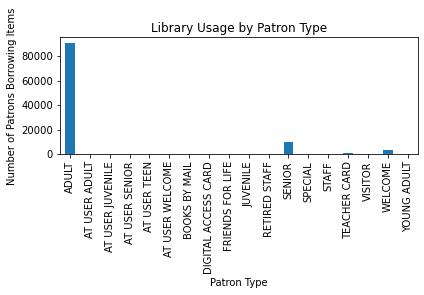

In [20]:
# Filter data so it only includes patrons who checked out at least one item
library_loans_df = pd.DataFrame(library_usage_df.loc[library_usage_df['Total Checkouts']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
patron_groups = library_loans_df.groupby('Patron Type Definition')

# # Find out how many of each patron type borrowed library items
patron_borrows = patron_groups['Total Checkouts'].count()

# # Chart our data, give it a title, and label the axes
patron_chart = patron_borrows.plot(kind="bar", title="Library Usage by Patron Type")
patron_chart.set_xlabel("Patron Type")
patron_chart.set_ylabel("Number of Patrons Borrowing Items")

plt.tight_layout()
plt.show()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each library branch. For this part of the activity, we want you to chart the total 'Total Checkouts' of each library, sorted by patron type. If you are able to, try and come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

Since there are quite a lot of patron types with minimal checkouts, the pie charts could look messy with overlapping text. You may also like to include a filter to limit the minimum number of total checkouts by patron group.

In [21]:
# Split up our data into groups based upon 'Home Library Definition' and 'Patron Type Definition'
library_groups = library_usage_df.groupby(['Home Library Definition','Patron Type Definition'])

# Create a new variable that holds the sum of our groups
sum_it_up = library_groups[['Total Checkouts']].sum()
sum_it_up.head(20)

Total Checkouts
Home Library Definition     Patron Type Definition                 
Anza                        ADULT                            345855
                            AT USER ADULT                        30
                            DIGITAL ACCESS CARD                   2
                            JUVENILE                           1374
                            SENIOR                            98145
                            TEACHER CARD                       1532
                            VISITOR                              13
                            WELCOME                              28
Bayview/Linda Brooks-Burton ADULT                            107796
                            AT USER ADULT                        42
                            AT USER SENIOR                        0
                            AT USER WELCOME                       0
                            DIGITAL ACCESS CARD                  12
                            JUVENILE                             16
                            SENIOR                            17140
                            STAFF                                14
                            TEACHER CARD                       1008
                            WELCOME                             124
Bernal Heights              ADULT                            255920
                            AT USER ADULT                       252

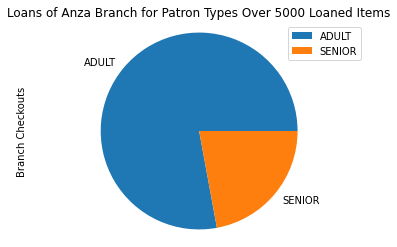

In [23]:
# Make a variable called branch and store a 'Home Library Definition' in it
branch = "Anza"

# Make a variable called min_checkouts that you can change depending on how busy the library branch you've chosen is
min_checkouts = 5000

# Collect the loans of the branch above
just_one_branch = sum_it_up.loc[branch]

# filter the data to patron types with greater than the value set for min_checkouts
just_one_branch = just_one_branch.loc[just_one_branch['Total Checkouts']>min_checkouts,:]

# Create a pie chart based upon the total checkouts (or loans) of that single branch
branch_pie = just_one_branch.plot(kind="pie", y='Total Checkouts', title=("Loans of " + branch + 
                                                                          " Branch for Patron Types Over "
                                                                         + str(min_checkouts) + " Loaned Items"))
branch_pie.set_ylabel("Branch Checkouts")

plt.axis("equal")
plt.show()